# Analysis of Babar Azam's Carrer

In [ ]:
loading neccesary packages

In [21]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


## Data

The data is from https://cricsheet.org/ , Cricsheet is a collection of projects which collectively provide data for various aspects of cricket. The current projects provide ball-by-ball match data for most cricket matches. I downloaded all Matches played by Pakistan which you can get from here https://cricsheet.org/downloads/
https://cricsheet.org/downloads/pakistan_male_json.zip

The data is available in YAML and JSON format, I choose to go ahead with JSON, it provides a JSON files for each match in record, first step was to extract all files and filter out all macthes where Babar Azam was part of the team.

In [22]:
all_pak_matches = os.listdir('pakistan_male_json')
babar_azam_matches = []
for match in all_pak_matches:
    if match != 'README.txt':
        fname = 'pakistan_male_json/' + match
        with open(fname, 'r') as f:
            data = json.load(f)
            if 'Babar Azam' in data['info']['players']['Pakistan']:
                babar_azam_matches.append(match)

In [23]:
print(len(all_pak_matches))

688


We have data from 681 matches played by Pakistan team, this includes all 3 formats Test, ODI and T20.

In [24]:
len(babar_azam_matches)

221

Babar Azam was part of playing 11 in 214 matches.

Next step is to extract some key variables from each match and create a dataframe from it to explore some highlevel statistics. The code block below reads every match where Babar Azam played and extract some key varaibles from it.

In [25]:
list_of_dict = []
for match in babar_azam_matches:
    with open('pakistan_male_json/' + match, 'r') as f:
        data = json.load(f)
        
#         print(match)
        dates = data['info']['dates']
        if 'event' in data['info']:
            name = data['info']['event']['name']
        else:
            name = ''
        match_type = data['info']['match_type']
        
        if 'winner' in data['info']['outcome']:
            outcome = data['info']['outcome']['winner']
        else:
            outcome = data['info']['outcome']['result']
        
        if 'player_of_match' in data['info']:
            player_of_match = data['info']['player_of_match'][0]
        else:
            player_of_match = ''
            
        toss_winner = data['info']['toss']['winner']
        toss_decision = data['info']['toss']['decision']
        match_venue = data['info']['venue']
        teams = data['info']['teams']
        teams.remove('Pakistan')
        
        temp_dict = {
            'match_filename' : match,
            'date' : dates[0],
            'name': name,
            'match_type': match_type,
            'outcome' : outcome,
            'player_of_match': player_of_match,
            'toss_winner':toss_winner,
            'toss_decision':toss_decision,
            'match_venue': match_venue,
            'against': teams[0]
        }
        list_of_dict.append(temp_dict)
        
        

In [152]:
def get_result(row):
    if row['outcome'] == 'Pakistan':
        return 'Win'
    elif row['outcome'] == 'draw' or row['outcome'] == 'tie' or row['outcome'] == 'no result':
        return row['outcome']
    else:
        return 'Lose'

def first_innings(row):
    if row['toss_winner'] == 'Pakistan' and row['toss_decision'] == 'bat':
        return 'Bat'
    elif row['toss_winner'] == 'Pakistan' and row['toss_decision'] == 'field':
        return 'field'
    elif row['toss_winner'] != 'Pakistan' and row['toss_decision'] == 'bat':
        return 'field'
    elif row['toss_winner'] != 'Pakistan' and row['toss_decision'] == 'field':
        return 'bat'

def pak_toss_win(row):
    if row['toss_winner'] == 'Pakistan':
        return True
    else:
        return False
    

In [27]:
df_baz = pd.DataFrame(list_of_dict)

df_baz['date'] = pd.to_datetime(df_baz['date'], format='%Y-%m-%d')
df_baz['result'] = df_baz.apply(get_result,axis=1)
df_baz['pak_first_innings'] = df_baz.apply(first_innings,axis=1)
df_baz



,match_filename,date,name,match_type,outcome,player_of_match,toss_winner,toss_decision,match_venue,against,result,pak_first_innings
0,1077953.json,2017-04-21,Pakistan in West Indies Test Series,Test,Pakistan,Yasir Shah,Pakistan,field,"Sabina Park, Kingston",West Indies,Win,field
1,1000881.json,2016-12-15,Pakistan in Australia Test Series,Test,Australia,Asad Shafiq,Australia,bat,"Brisbane Cricket Ground, Woolloongabba",Australia,Lose,field
2,1157383.json,2018-12-03,New Zealand tour of United Arab Emirates,Test,New Zealand,KS Williamson,New Zealand,bat,Sheikh Zayed Stadium,New Zealand,Lose,field
3,1117821.json,2017-09-12,Independence Cup,T20,Pakistan,Babar Azam,ICC World XI,field,Gaddafi Stadium,ICC World XI,Win,bat
4,1206635.json,2019-12-11,Sri Lanka in Pakistan Test Series,Test,draw,Abid Ali,Sri Lanka,bat,Rawalpindi Cricket Stadium,Sri Lanka,draw,field
...,...,...,...,...,...,...,...,...,...,...,...,...
216,1263167.json,2021-08-03,Pakistan tour of West Indies,T20,no result,,Pakistan,field,"Providence Stadium, Guyana",West Indies,no result,field
217,1288314.json,2022-03-31,Australia tour of Pakistan,ODI,Pakistan,Babar Azam,Pakistan,field,"Gaddafi Stadium, Lahore",Australia,Win,field
218,1120291.json,2017-10-26,Sri Lanka tour of United Arab Emirates and Pak...,T20,Pakistan,Usman Shinwari,Pakistan,field,Sheikh Zayed Stadium,Sri Lanka,Win,field
219,1327233.json,2022-09-30,England tour of Pakistan,T20,England,PD Salt,England,field,"Gaddafi Stadium, Lahore",England,Lose,bat


I created 2 helper function to add a column for outcome of match and wethaer pakistan batted first or fielded first.

In cricket the stats are commonly viewd by match type in most cases, so i'll try to present the stats by each match type moving forward.

## Top 3 venues where Babar Azam has Played By match Type

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

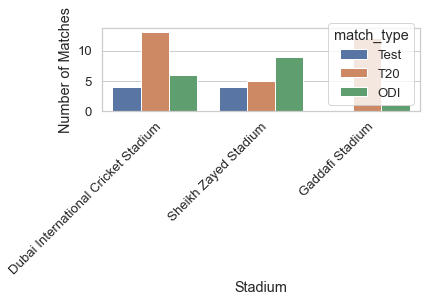

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='match_venue', 
                  data=df_baz,
                 order = df_baz['match_venue'].value_counts().iloc[:3].index, hue='match_type')
p.set_xlabel("Stadium")
p.set_ylabel("Number of Matches")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


## Distribution of Matches by Type

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

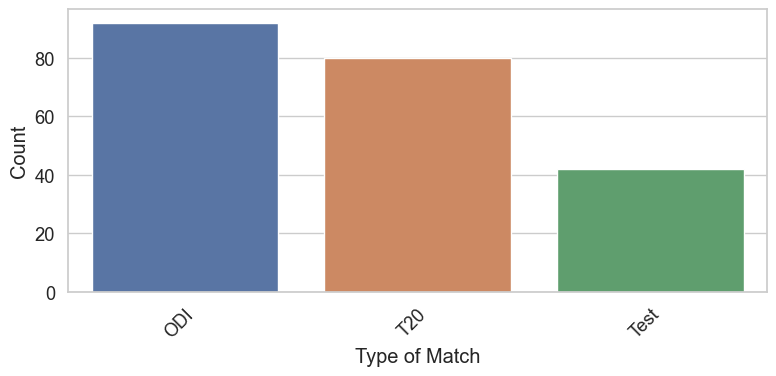

In [353]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='match_type', 
                  data=df_baz,
                 order = df_baz['match_type'].value_counts().index)
p.set_xlabel("Type of Match")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


## Win Vs Lose in each type of match where Babr Azam Played

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

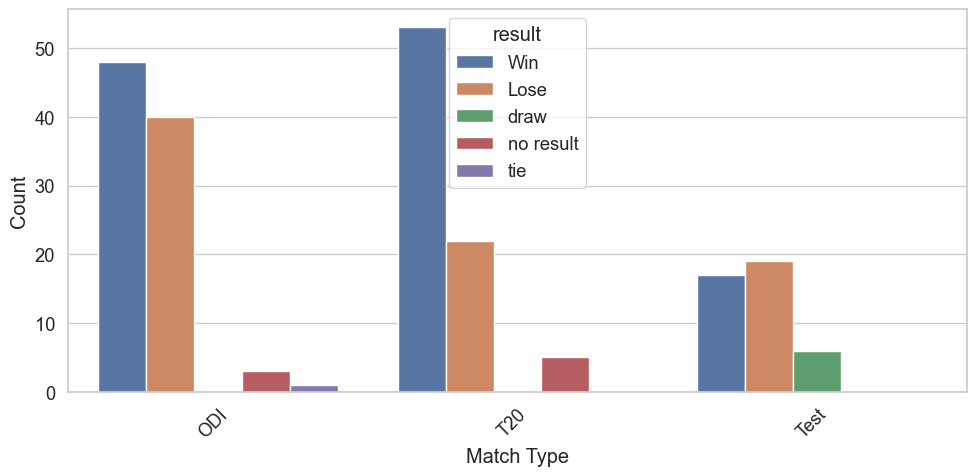

In [354]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='match_type', 
                  data=df_baz,
                 order = df_baz['match_type'].value_counts().index,
                 hue='result')
p.set_xlabel("Match Type")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


## Player of The Match
*Out of all macthes where Babar Azam Played

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

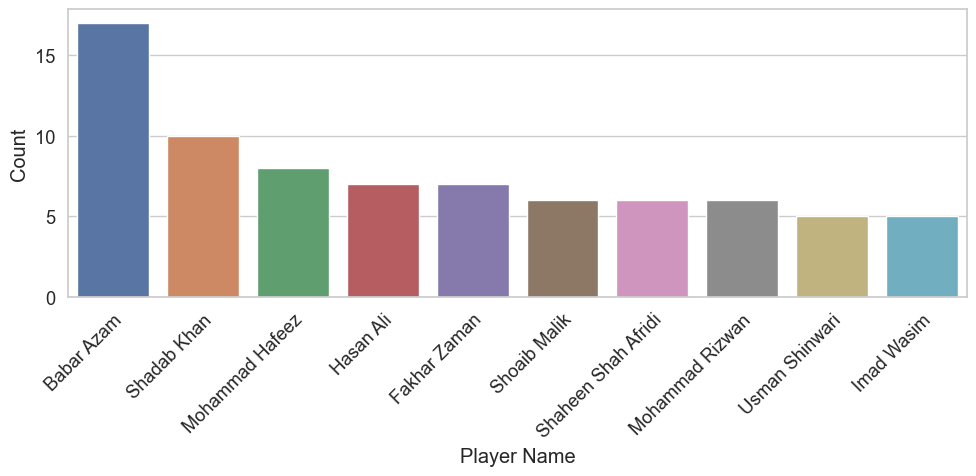

In [373]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='player_of_match', 
                  data=df_baz[df_baz['result'] == 'Win'],
                 order = df_baz[df_baz['result'] == 'Win']['player_of_match'].value_counts().iloc[:10].index)
p.set_xlabel("Player Name")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


## Most Matches Played Against

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

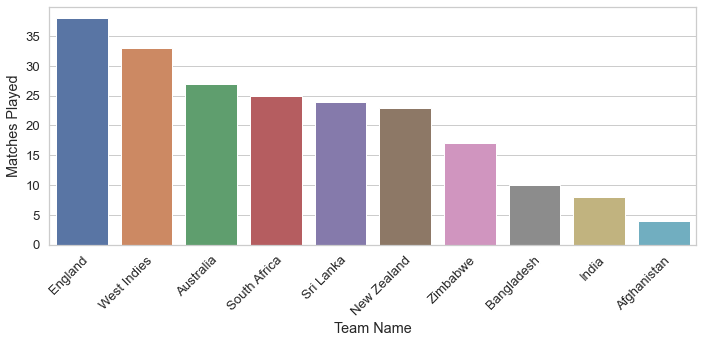

In [9]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='against', 
                  data=df_baz,
                 order = df_baz['against'].value_counts().iloc[:10].index)
p.set_xlabel("Team Name")
p.set_ylabel("Matches Played")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


In [29]:
df_t20 = df_baz[df_baz['match_type'] == 'T20']
df_t20

,match_filename,date,name,match_type,outcome,player_of_match,toss_winner,toss_decision,match_venue,against,result,pak_first_innings
3,1117821.json,2017-09-12,Independence Cup,T20,Pakistan,Babar Azam,ICC World XI,field,Gaddafi Stadium,ICC World XI,Win,bat
5,1273735.json,2021-10-29,ICC Men's T20 World Cup,T20,Pakistan,Asif Ali,Afghanistan,bat,Dubai International Cricket Stadium,Afghanistan,Win,field
10,1198246.json,2020-09-01,Pakistan tour of England,T20,Pakistan,Mohammad Hafeez,England,field,Old Trafford,England,Win,bat
12,1263164.json,2021-07-28,Pakistan tour of West Indies,T20,no result,,Pakistan,field,"Kensington Oval, Bridgetown, Barbados",West Indies,no result,field
14,1120292.json,2017-10-27,Sri Lanka tour of United Arab Emirates and Pak...,T20,Pakistan,Shadab Khan,Pakistan,field,Sheikh Zayed Stadium,Sri Lanka,Win,field
...,...,...,...,...,...,...,...,...,...,...,...,...
214,1198245.json,2020-08-30,Pakistan tour of England,T20,England,EJG Morgan,England,field,Old Trafford,England,Lose,bat
215,1277974.json,2021-11-19,Pakistan tour of Bangladesh,T20,Pakistan,Hasan Ali,Bangladesh,bat,"Shere Bangla National Stadium, Mirpur",Bangladesh,Win,field
216,1263167.json,2021-08-03,Pakistan tour of West Indies,T20,no result,,Pakistan,field,"Providence Stadium, Guyana",West Indies,no result,field
218,1120291.json,2017-10-26,Sri Lanka tour of United Arab Emirates and Pak...,T20,Pakistan,Usman Shinwari,Pakistan,field,Sheikh Zayed Stadium,Sri Lanka,Win,field


In [30]:
df_t20['result'].value_counts()

Win          56
Lose         26
no result     5
Name: result, dtype: int64

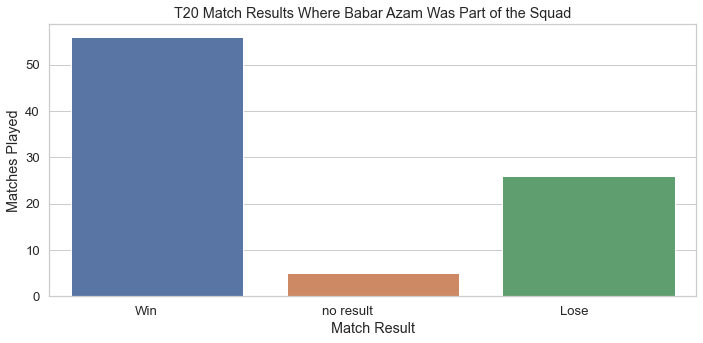

In [38]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='result', 
                  data=df_t20
                )
p.set_xlabel("Match Result")
p.set_ylabel("Matches Played")
p.set_title("T20 Match Results Where Babar Azam Was Part of the Squad")
plt.xticks(rotation=0,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt
# plt.savefig('plots/t20_results.png',dpi=300)

In [39]:
df_t20 = df_t20[df_t20['result'] != 'no result']

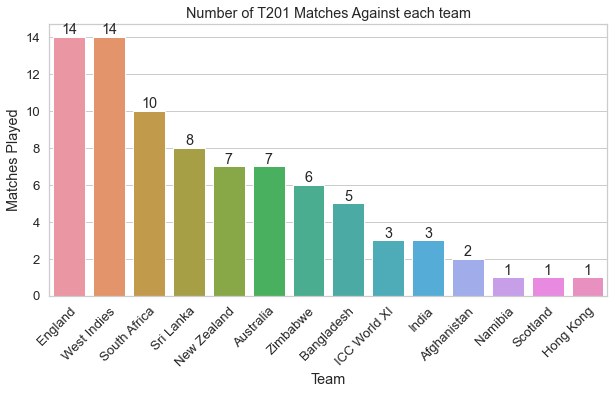

In [68]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='against', 
                  data=df_t20,
                 order = df_t20['against'].value_counts().index
                 )
p.set_xlabel("Team")
p.set_ylabel("Matches Played")
p.set_title('Number of T201 Matches Against each team')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
p.bar_label(p.containers[0])
plt
plt.savefig('plots/t20_against_teams.png',dpi=300)

We have ball by ball data of each match, i'll now extract all balls played by babar azam into a new dataset, and then add total runs scored by him in this dataset.

In [45]:
# this function extracts all bowls played by babar azam in a match
def get_score(data,fname):
#     print(fname)
    all_bowls_ba = []
    teams = data['info']['teams']
    teams.remove('Pakistan')
    
    match_type = data['info']['match_type']
    toss_winner = data['info']['toss']['winner']
    toss_decision = data['info']['toss']['decision']
    match_venue = data['info']['venue']
    dates = data['info']['dates'][0]
    
    if 'winner' in data['info']['outcome']:
        outcome = data['info']['outcome']['winner']
    else:
        outcome = data['info']['outcome']['result']


    
    inning_num = 0
    for innings in data['innings']:
        inning_num +=1
        if innings['team'] == 'Pakistan':
            overs = innings['overs']
            
            for over in overs:
                for delivery in over['deliveries']:
                    batter = delivery['batter']
                    if batter == 'Babar Azam':
                        temp_dict = {}
                        temp_dict['match_fname'] = fname
                        temp_dict['match_type'] = match_type
                        temp_dict['toss_winner'] = toss_winner
                        temp_dict['toss_decision'] = toss_decision
                        temp_dict['match_venue'] = match_venue
                        temp_dict['dates'] = dates

                        temp_dict['against_team'] = teams[0]
                        temp_dict['outcome'] = outcome
                        temp_dict['inning_num'] = inning_num
                        temp_dict['match_inning'] = str(fname) + '_' + str(inning_num)
                        

                        

                        non_striker = delivery['non_striker']
                        runs = delivery['runs']['batter']
                        extras = delivery['runs']['extras']
                        bowler = delivery['bowler']

                        temp_dict['batter'] = batter
                        temp_dict['non_striker'] = non_striker
                        temp_dict['runs'] = runs
                        temp_dict['bowler'] = bowler

                        temp_dict['out'] = False
                        temp_dict['fielders'] = ''



                        if 'wickets' in delivery:

                            for wicket in delivery['wickets']:
            #                     print(wicket)
                                if wicket['player_out'] == 'Babar Azam':
                                    temp_dict['out'] = True
                                    wicket_kind = wicket['kind']
                                    temp_dict['wicket_kind'] = wicket_kind


                                    if 'fielders' in wicket:
                                        temp_dict['fielders'] = wicket['fielders'][0]
                                    else:
                                        fielders = []
                        all_bowls_ba.append(temp_dict)
    return all_bowls_ba
        

In [46]:
all_bowls = []
for match in babar_azam_matches:
    with open('pakistan_male_json/' + match, 'r') as f:
        data = json.load(f)
        balls = get_score(data,match)
        all_bowls.extend(balls)
        

In [47]:
ba_df = pd.DataFrame(all_bowls)    

In [48]:
ba_df['dates'] =  pd.to_datetime(ba_df['dates'], format='%Y-%m-%d')


In [49]:
ba_df

,match_fname,match_type,toss_winner,toss_decision,match_venue,dates,against_team,outcome,inning_num,match_inning,batter,non_striker,runs,bowler,out,fielders,wicket_kind
0,1077953.json,Test,Pakistan,field,"Sabina Park, Kingston",2017-04-21,West Indies,Pakistan,2,1077953.json_2,Babar Azam,Ahmed Shehzad,0,AS Joseph,False,,NaN
1,1077953.json,Test,Pakistan,field,"Sabina Park, Kingston",2017-04-21,West Indies,Pakistan,2,1077953.json_2,Babar Azam,Ahmed Shehzad,0,AS Joseph,False,,NaN
2,1077953.json,Test,Pakistan,field,"Sabina Park, Kingston",2017-04-21,West Indies,Pakistan,2,1077953.json_2,Babar Azam,Ahmed Shehzad,0,JO Holder,False,,NaN
3,1077953.json,Test,Pakistan,field,"Sabina Park, Kingston",2017-04-21,West Indies,Pakistan,2,1077953.json_2,Babar Azam,Ahmed Shehzad,0,JO Holder,False,,NaN
4,1077953.json,Test,Pakistan,field,"Sabina Park, Kingston",2017-04-21,West Indies,Pakistan,2,1077953.json_2,Babar Azam,Ahmed Shehzad,0,JO Holder,False,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13565,1152842.json,ODI,Pakistan,field,The Rose Bowl,2019-05-11,England,England,2,1152842.json_2,Babar Azam,Fakhar Zaman,1,CR Woakes,False,,NaN
13566,1152842.json,ODI,Pakistan,field,The Rose Bowl,2019-05-11,England,England,2,1152842.json_2,Babar Azam,Asif Ali,2,AU Rashid,False,,NaN
13567,1152842.json,ODI,Pakistan,field,The Rose Bowl,2019-05-11,England,England,2,1152842.json_2,Babar Azam,Asif Ali,2,AU Rashid,False,,NaN
13568,1152842.json,ODI,Pakistan,field,The Rose Bowl,2019-05-11,England,England,2,1152842.json_2,Babar Azam,Asif Ali,1,AU Rashid,False,,NaN


In [50]:
ba_df['match_inning'].nunique()

247

Babar Azam has Faced 13,366 balls in all 3 formats of cricket in a total of 214 Matches and 240 innings, that is an average of 55 balls per inning.
Before we merge the total from each innings with our previous dataframe, lets have a look at some playing statistics of Babar Azam.

As T20 is currently the most hyped format of the game, lets just look at his T20 stats.

In [51]:
ba_df_t20 = ba_df[ba_df['match_type'] == 'T20']

# Matches Played against each team?

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

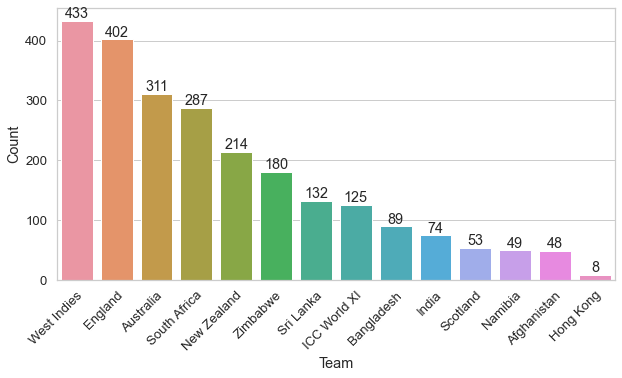

In [67]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='against_team', 
                  data=ba_df_t20,
                 order = ba_df_t20['against_team'].value_counts().index)
p.set_xlabel("Team")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
p.bar_label(p.containers[0])
plt


# Most Faced Bowlers

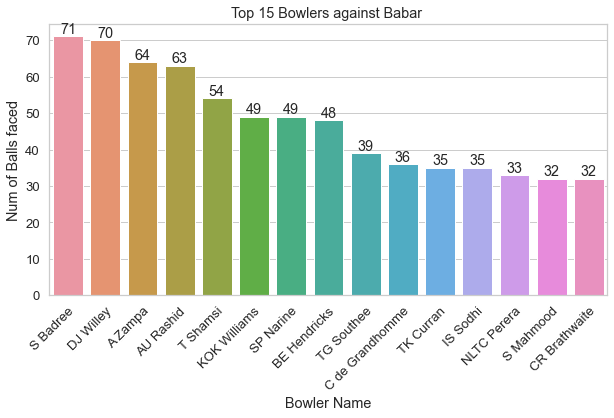

In [66]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='bowler', 
                  data=ba_df_t20,
                 order = ba_df_t20['bowler'].value_counts().iloc[:15].index)
p.set_xlabel("Bowler Name")
p.set_ylabel("Num of Balls faced")
p.set_title('Top 15 Bowlers against Babar ')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
p.bar_label(p.containers[0])
plt
plt.savefig('plots/t20_to_15_bowlers.png',dpi=300)


# How does Babar like to score in T20s

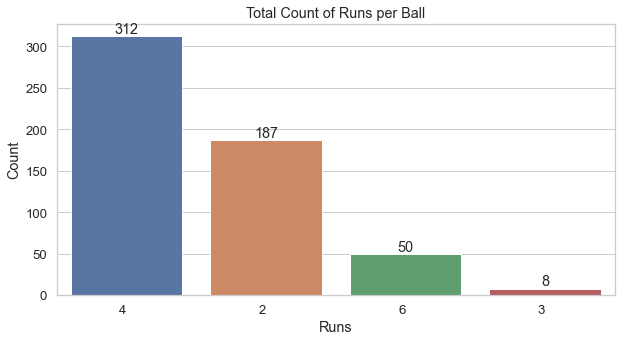

In [65]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='runs', 
                  data=ba_df_t20[ba_df_t20['runs'] > 1],
                 order = ba_df_t20[ba_df_t20['runs'] > 1]['runs'].value_counts().iloc[:10].index)
p.set_xlabel("Runs")
p.set_ylabel("Count")
p.set_title('Total Count of Runs per Ball')
plt.xticks(rotation=0,ha='right',rotation_mode='anchor')
p.bar_label(p.containers[0])
plt
plt.savefig('plots/t20_runs_distribution.png',dpi=300)


Babar has more singles than Dot balls over his entire T20 carrer

## How does he get Out??

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

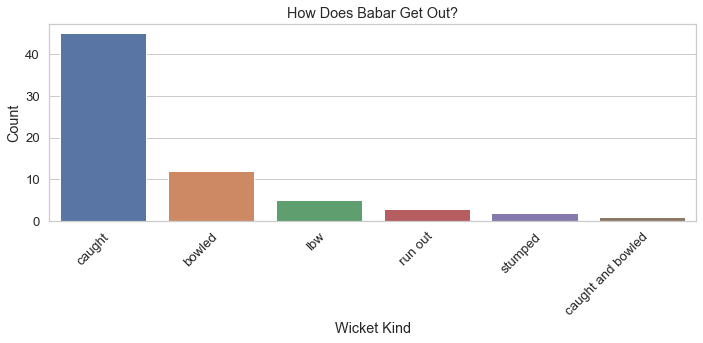

In [72]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='wicket_kind', 
                  data=ba_df_t20,
                 order = ba_df_t20['wicket_kind'].value_counts().index)

# ax = sns.countplot(x='User', data=df)
# p.bar_label(p.containers[0])
# for pp in p.patches:
#     p.annotate(f'\n{pp.get_height()}', (pp.get_x()+0.2, pp.get_height()), ha='center', va='top', color='white', size=18)

p.set_xlabel("Wicket Kind")
p.set_ylabel("Count")
p.set_title('How Does Babar Get Out?')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')


plt.tight_layout()
plt.savefig('plots/t20_out_distribution.png',dpi=300)

plt


Majority of the time he get out by being caught, then comes bowled followed by LBW

# Which Bowler has taken wicket of Babar Azam Most times? Any gusses?

In [77]:
# ba_df_t20[ba_df_t20['out'] == True]['bowler'].value_counts()

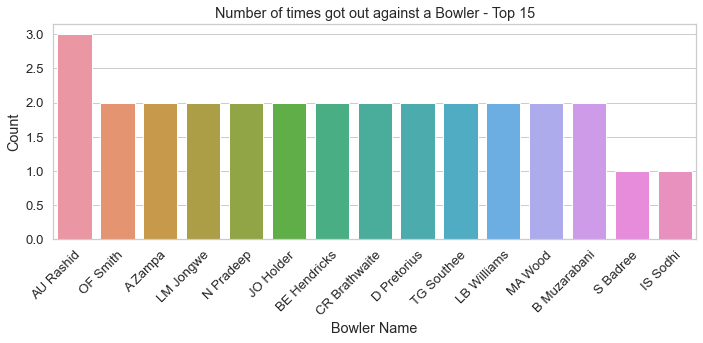

In [79]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='bowler', 
                  data=ba_df_t20[ba_df_t20['out'] == True],
                 order = ba_df_t20[ba_df_t20['out'] == True]['bowler'].value_counts().iloc[:15].index)
p.set_xlabel("Bowler Name")
p.set_ylabel("Count")
p.set_title('Number of times got out against a Bowler - Top 15')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt
plt.savefig('plots/t20_out_bowlers.png',dpi=300)


No one has taken Babar's wicket more than 2 times in his T20 carrer.

# Who has Babar hit most 6's in T20s?

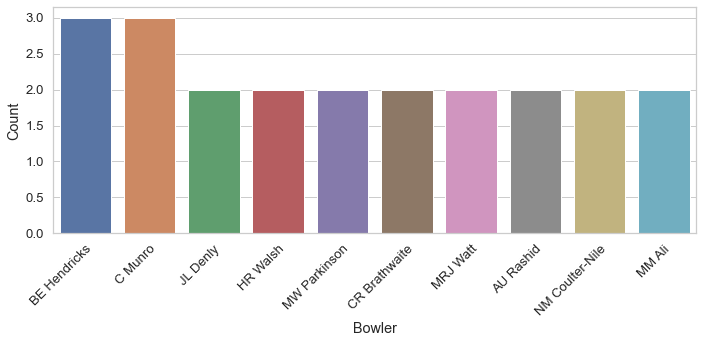

In [78]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='bowler', 
                  data=ba_df_t20[ba_df_t20['runs'] == 6],
                 order = ba_df_t20[ba_df_t20['runs'] == 6]['bowler'].value_counts().iloc[:10].index)
p.set_xlabel("Bowler")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt



# what about 4's ?

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

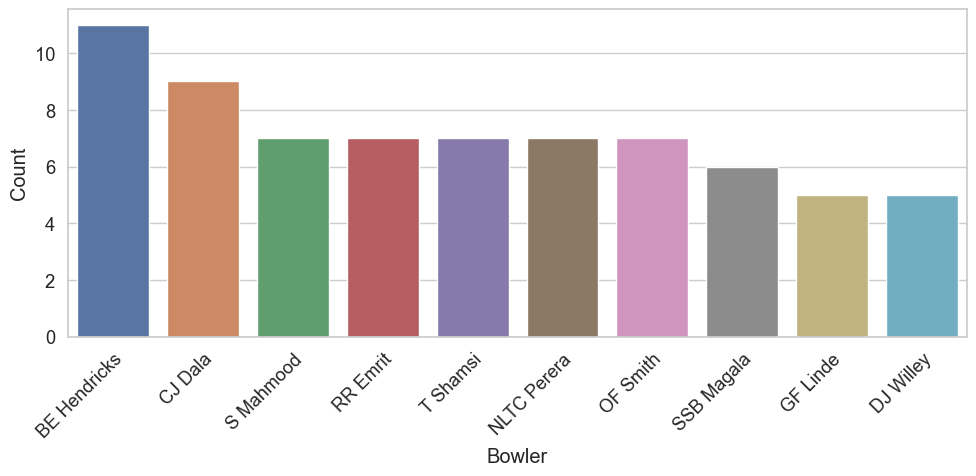

In [403]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='bowler', 
                  data=ba_df_t20[ba_df_t20['runs'] == 4],
                 order = ba_df_t20[ba_df_t20['runs'] == 4]['bowler'].value_counts().iloc[:10].index)
p.set_xlabel("Bowler")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


# Who has been on the receiving end of most boundries?

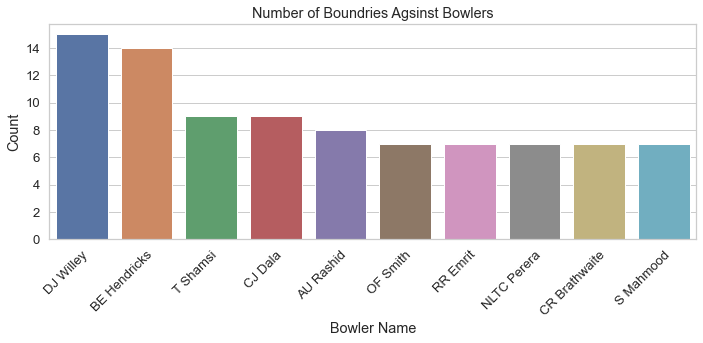

In [81]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='bowler', 
                  data=ba_df_t20[(ba_df_t20['runs'] == 4) | (ba_df_t20['runs'] == 6)],
                 order = ba_df_t20[(ba_df_t20['runs'] == 4) | (ba_df_t20['runs'] == 6)]['bowler'].value_counts().iloc[:10].index)
p.set_xlabel("Bowler Name")
p.set_ylabel("Count")
p.set_title('Number of Boundries Agsinst Bowlers')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt
plt.savefig('plots/t20_boundires_bowlers.png',dpi=300)



Babar Azam has hit 14 boundires against Beuran Eric Hendricks from South Africa.

# Most Boundries against a team?

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

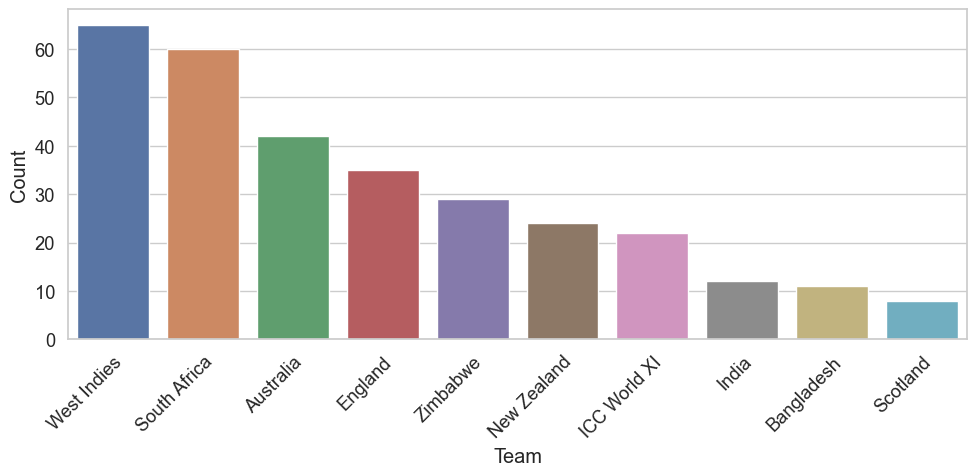

In [407]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='against_team', 
                  data=ba_df_t20[(ba_df_t20['runs'] == 4) | (ba_df_t20['runs'] == 6)],
                 order = ba_df_t20[(ba_df_t20['runs'] == 4) | (ba_df_t20['runs'] == 6)]['against_team'].value_counts().iloc[:10].index)
p.set_xlabel("Team")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


To all the people that say Babar has most runs against small team like Zimbabwe, here's the answer, he has hit more boundires against Australia and England than Zimbabwe.

In [89]:
summ_df = ba_df_t20.groupby('against_team').sum()
summ_df

,inning_num,runs,out
against_team,,,
Afghanistan,96,51,2
Australia,311,383,6
Bangladesh,178,93,4
England,508,560,11
Hong Kong,8,9,1
ICC World XI,125,179,3
India,137,92,2
Namibia,49,70,1
New Zealand,269,244,6


In [112]:
ba_df_t20.groupby('against_team')['match_fname'].nunique()

against_team
Afghanistan      2
Australia        8
Bangladesh       5
England         14
Hong Kong        1
ICC World XI     3
India            3
Namibia          1
New Zealand      7
Scotland         1
South Africa    10
Sri Lanka        8
West Indies     14
Zimbabwe         5
Name: match_fname, dtype: int64

In [109]:
summ_df['balls_faced'] = ba_df_t20.groupby('against_team').count()['match_fname']


In [115]:
summ_df = summ_df.assign(num_innings = ba_df_t20.groupby('against_team')['match_fname'].nunique().values)


In [116]:
summ_df

,against_team,inning_num,runs,out,avg,balls_faced,strike_rate,innings_played,num_innings
0,Afghanistan,96,51,2,25.500000,NaN,106.250000,NaN,2
1,Australia,311,383,6,63.833333,NaN,123.151125,NaN,8
2,Bangladesh,178,93,4,23.250000,NaN,104.494382,NaN,5
3,England,508,560,11,50.909091,NaN,139.303483,NaN,14
4,Hong Kong,8,9,1,9.000000,NaN,112.500000,NaN,1
5,ICC World XI,125,179,3,59.666667,NaN,143.200000,NaN,3
6,India,137,92,2,46.000000,NaN,124.324324,NaN,3
7,Namibia,49,70,1,70.000000,NaN,142.857143,NaN,1
8,New Zealand,269,244,6,40.666667,NaN,114.018692,NaN,7
9,Scotland,53,66,1,66.000000,NaN,124.528302,NaN,1


In [95]:
summ_df['avg'] = summ_df['runs']/summ_df['out']
summ_df['strike_rate']= (summ_df['runs']/summ_df['balls_faced'])*100
summ_df

,inning_num,runs,out,avg,balls_faced,strike_rate
against_team,,,,,,
Afghanistan,96,51,2,25.500000,48,106.250000
Australia,311,383,6,63.833333,311,123.151125
Bangladesh,178,93,4,23.250000,89,104.494382
England,508,560,11,50.909091,402,139.303483
Hong Kong,8,9,1,9.000000,8,112.500000
ICC World XI,125,179,3,59.666667,125,143.200000
India,137,92,2,46.000000,74,124.324324
Namibia,49,70,1,70.000000,49,142.857143
New Zealand,269,244,6,40.666667,214,114.018692


In [117]:
# summ_df = summ_df.reset_index()
summ_df

,against_team,inning_num,runs,out,avg,balls_faced,strike_rate,innings_played,num_innings
0,Afghanistan,96,51,2,25.500000,NaN,106.250000,NaN,2
1,Australia,311,383,6,63.833333,NaN,123.151125,NaN,8
2,Bangladesh,178,93,4,23.250000,NaN,104.494382,NaN,5
3,England,508,560,11,50.909091,NaN,139.303483,NaN,14
4,Hong Kong,8,9,1,9.000000,NaN,112.500000,NaN,1
5,ICC World XI,125,179,3,59.666667,NaN,143.200000,NaN,3
6,India,137,92,2,46.000000,NaN,124.324324,NaN,3
7,Namibia,49,70,1,70.000000,NaN,142.857143,NaN,1
8,New Zealand,269,244,6,40.666667,NaN,114.018692,NaN,7
9,Scotland,53,66,1,66.000000,NaN,124.528302,NaN,1


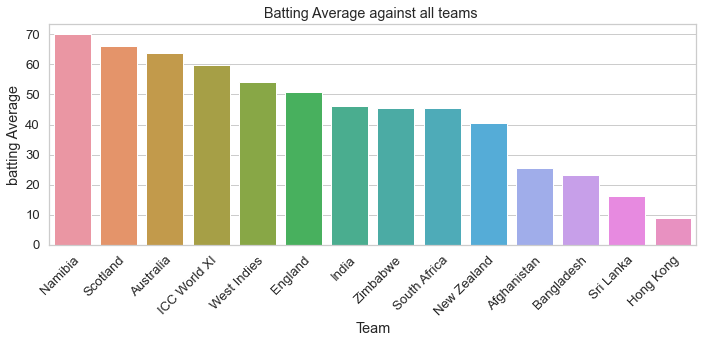

In [102]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.barplot(data=summ_df, x="against_team", y="avg",
               order=summ_df.sort_values('avg',ascending=False).against_team)

p.set_xlabel("Team")
p.set_ylabel("batting Average")
p.set_title('Batting Average against all teams ')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt
plt.savefig('plots/t20_avg_teams.png',dpi=300)



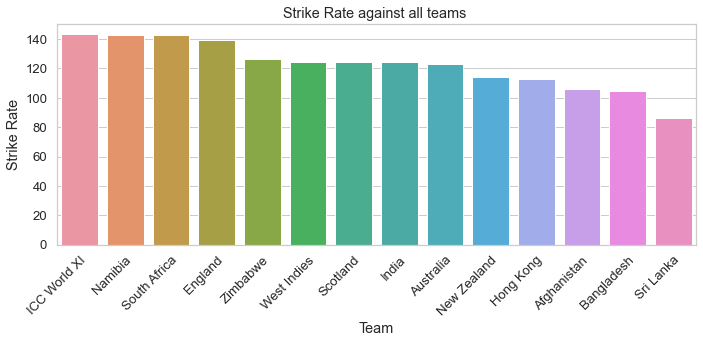

In [118]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.barplot(data=summ_df, x="against_team", y="strike_rate",
               order=summ_df.sort_values('strike_rate',ascending=False).against_team)

p.set_xlabel("Team")
p.set_ylabel("Strike Rate")
p.set_title('Strike Rate against all teams ')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt
plt.savefig('plots/t20_sr_teams.png',dpi=300)



# Most dot balls agsinst a bowler? who does he struggle against?

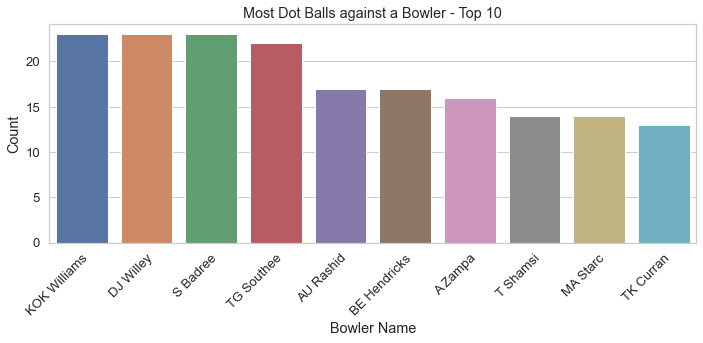

In [96]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='bowler', 
                  data=ba_df_t20[ba_df_t20['runs'] == 0],
                 order = ba_df_t20[ba_df_t20['runs'] == 0]['bowler'].value_counts().iloc[:10].index)
p.set_xlabel("Bowler Name")
p.set_ylabel("Count")
p.set_title('Most Dot Balls against a Bowler - Top 10')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt
plt.savefig('plots/t20_dot_balls.png',dpi=300)



# Most dot balls against a Team

<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

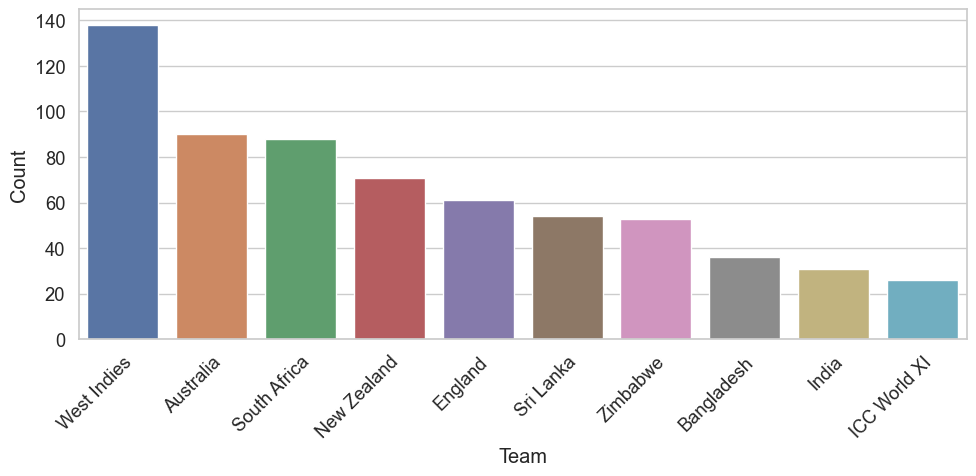

In [410]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='against_team', 
                  data=ba_df_t20[ba_df_t20['runs'] == 0],
                 order = ba_df_t20[ba_df_t20['runs'] == 0]['against_team'].value_counts().iloc[:10].index)
p.set_xlabel("Team")
p.set_ylabel("Count")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


### Calculating Total score in each inning
- I calcluate total score in each inning and merge it with our earlier match wise dataframe

In [124]:
ba_totals = ba_df_t20.groupby(['match_fname','dates']).sum()
ba_totals = ba_totals.reset_index()
ba_totals = ba_totals.sort_values('dates')
ba_totals

,match_fname,dates,inning_num,runs,out
81,913663.json,2016-09-07,22,15,0
0,1050217.json,2016-09-23,74,55,0
1,1050219.json,2016-09-24,19,19,1
2,1050221.json,2016-09-27,50,27,0
3,1077947.json,2017-03-26,64,29,1
...,...,...,...,...,...
70,1327230.json,2022-09-23,12,8,1
71,1327231.json,2022-09-25,28,36,1
72,1327232.json,2022-09-28,13,9,1
73,1327233.json,2022-09-30,60,87,0


In [120]:
.dtypesba_totals

match_fname            object
dates          datetime64[ns]
inning_num              int64
runs                    int64
out                     int64
dtype: object

In [125]:

ba_totals['cumSum'] = ba_totals['runs'].cumsum()
ba_totals['outs_cs'] = ba_totals['out'].cumsum()
ba_totals = ba_totals[['match_fname','runs','cumSum','dates','outs_cs']]
ba_totals

,match_fname,runs,cumSum,dates,outs_cs
81,913663.json,15,15,2016-09-07,0
0,1050217.json,55,70,2016-09-23,0
1,1050219.json,19,89,2016-09-24,1
2,1050221.json,27,116,2016-09-27,1
3,1077947.json,29,145,2017-03-26,2
...,...,...,...,...,...
70,1327230.json,8,2903,2022-09-23,65
71,1327231.json,36,2939,2022-09-25,66
72,1327232.json,9,2948,2022-09-28,67
73,1327233.json,87,3035,2022-09-30,67


In [167]:
merg_df = df_baz[df_baz['match_type'] == 'T20'].set_index('match_filename').join(ba_totals.set_index('match_fname'))


In [168]:
# merg_df = merg_df[merg_df['result'] != 'no result']
merg_df

,date,name,match_type,outcome,player_of_match,toss_winner,toss_decision,match_venue,against,result,pak_first_innings,runs,cumSum,dates,outs_cs
match_filename,,,,,,,,,,,,,,,
1117821.json,2017-09-12,Independence Cup,T20,Pakistan,Babar Azam,ICC World XI,field,Gaddafi Stadium,ICC World XI,Win,bat,86.0,339.0,2017-09-12,6.0
1273735.json,2021-10-29,ICC Men's T20 World Cup,T20,Pakistan,Asif Ali,Afghanistan,bat,Dubai International Cricket Stadium,Afghanistan,Win,field,51.0,2332.0,2021-10-29,48.0
1198246.json,2020-09-01,Pakistan tour of England,T20,Pakistan,Mohammad Hafeez,England,field,Old Trafford,England,Win,bat,21.0,1548.0,2020-09-01,30.0
1263164.json,2021-07-28,Pakistan tour of West Indies,T20,no result,,Pakistan,field,"Kensington Oval, Bridgetown, Barbados",West Indies,no result,field,NaN,NaN,NaT,NaN
1120292.json,2017-10-27,Sri Lanka tour of United Arab Emirates and Pak...,T20,Pakistan,Shadab Khan,Pakistan,field,Sheikh Zayed Stadium,Sri Lanka,Win,field,1.0,434.0,2017-10-27,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198245.json,2020-08-30,Pakistan tour of England,T20,England,EJG Morgan,England,field,Old Trafford,England,Lose,bat,56.0,1527.0,2020-08-30,29.0
1277974.json,2021-11-19,Pakistan tour of Bangladesh,T20,Pakistan,Hasan Ali,Bangladesh,bat,"Shere Bangla National Stadium, Mirpur",Bangladesh,Win,field,7.0,2514.0,2021-11-19,52.0
1263167.json,2021-08-03,Pakistan tour of West Indies,T20,no result,,Pakistan,field,"Providence Stadium, Guyana",West Indies,no result,field,NaN,NaN,NaT,NaN


In [169]:
merg_df = merg_df.sort_values('date')

In [170]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot

In [171]:
ba_totals.sort_values('dates')

,match_fname,runs,cumSum,dates,outs_cs
81,913663.json,15,15,2016-09-07,0
0,1050217.json,55,70,2016-09-23,0
1,1050219.json,19,89,2016-09-24,1
2,1050221.json,27,116,2016-09-27,1
3,1077947.json,29,145,2017-03-26,2
...,...,...,...,...,...
70,1327230.json,8,2903,2022-09-23,65
71,1327231.json,36,2939,2022-09-25,66
72,1327232.json,9,2948,2022-09-28,67
73,1327233.json,87,3035,2022-09-30,67


In [172]:
merg_df['avg'] = merg_df['cumSum']/ merg_df['outs_cs']
merg_df

,date,name,match_type,outcome,player_of_match,toss_winner,toss_decision,match_venue,against,result,pak_first_innings,runs,cumSum,dates,outs_cs,avg
match_filename,,,,,,,,,,,,,,,,
913663.json,2016-09-07,,T20,Pakistan,Wahab Riaz,England,bat,Old Trafford,England,Win,field,15.0,15.0,2016-09-07,0.0,inf
1050217.json,2016-09-23,Pakistan v West Indies T20I Series,T20,Pakistan,Imad Wasim,Pakistan,field,Dubai International Cricket Stadium,West Indies,Win,field,55.0,70.0,2016-09-23,0.0,inf
1050219.json,2016-09-24,Pakistan v West Indies T20I Series,T20,Pakistan,Sarfraz Ahmed,West Indies,field,Dubai International Cricket Stadium,West Indies,Win,bat,19.0,89.0,2016-09-24,1.0,89.000000
1050221.json,2016-09-27,Pakistan v West Indies T20I Series,T20,Pakistan,Imad Wasim,Pakistan,field,Sheikh Zayed Stadium,West Indies,Win,field,27.0,116.0,2016-09-27,1.0,116.000000
1077947.json,2017-03-26,Pakistan in West Indies T20I Series,T20,Pakistan,Shadab Khan,Pakistan,field,"Kensington Oval, Bridgetown",West Indies,Win,field,29.0,145.0,2017-03-26,2.0,72.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327230.json,2022-09-23,England tour of Pakistan,T20,England,HC Brook,Pakistan,field,"National Stadium, Karachi",England,Lose,field,8.0,2903.0,2022-09-23,65.0,44.661538
1327231.json,2022-09-25,England tour of Pakistan,T20,Pakistan,Haris Rauf,England,field,"National Stadium, Karachi",England,Win,bat,36.0,2939.0,2022-09-25,66.0,44.530303
1327232.json,2022-09-28,England tour of Pakistan,T20,Pakistan,Mohammad Rizwan,England,field,"Gaddafi Stadium, Lahore",England,Win,bat,9.0,2948.0,2022-09-28,67.0,44.000000


In [173]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

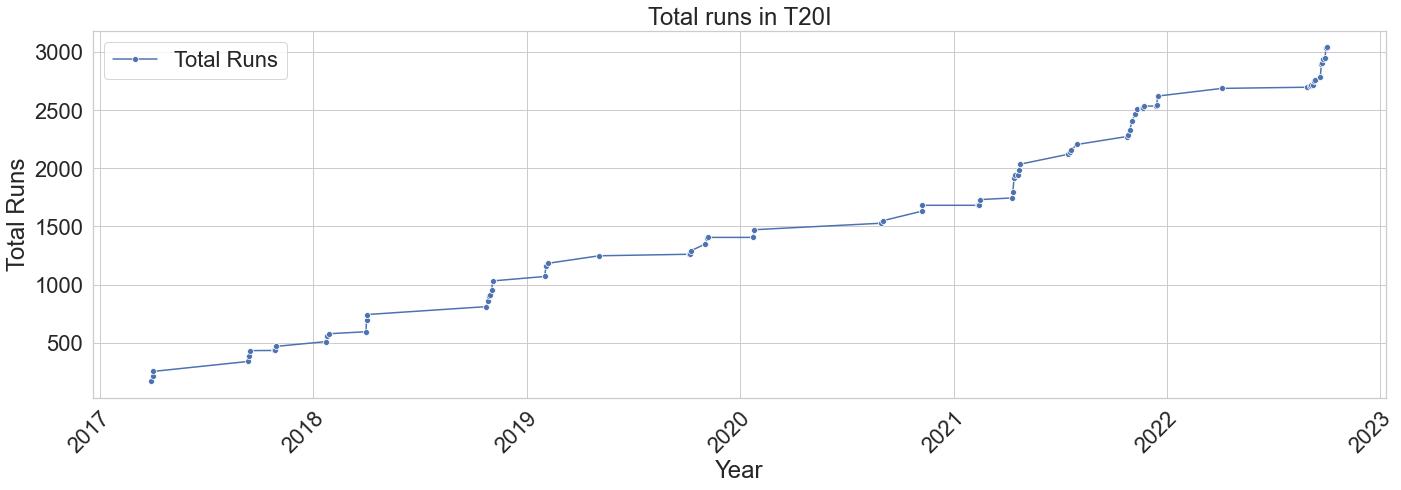

In [176]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.set(font="Verdana")
sns.set(font_scale = 2)

sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(20,7))

# p = sns.barplot(x="date", y="runs", data=merg_df)
# barplot(data=df, x="island", y="body_mass_g")
p = sns.lineplot(data=merg_df[merg_df['avg'] < 60], x='dates',y='cumSum', label = 'Total Runs', marker = 'o')

p.set_xlabel("Year")
p.set_ylabel("Total Runs")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()

# axes.xaxis.set_major_locator(months)
# axes.xaxis.set_major_formatter(years_fmt)
# axes.xaxis.set_minor_locator(months)

p.set_title('Total runs in T20I')



# plt.xticks(rotation = 'vertical')

# plt.draw()

plt.savefig('plots/batt_total_runs_time.png',dpi=300)
plt.show()

In [175]:
merg_df.shape

(87, 16)

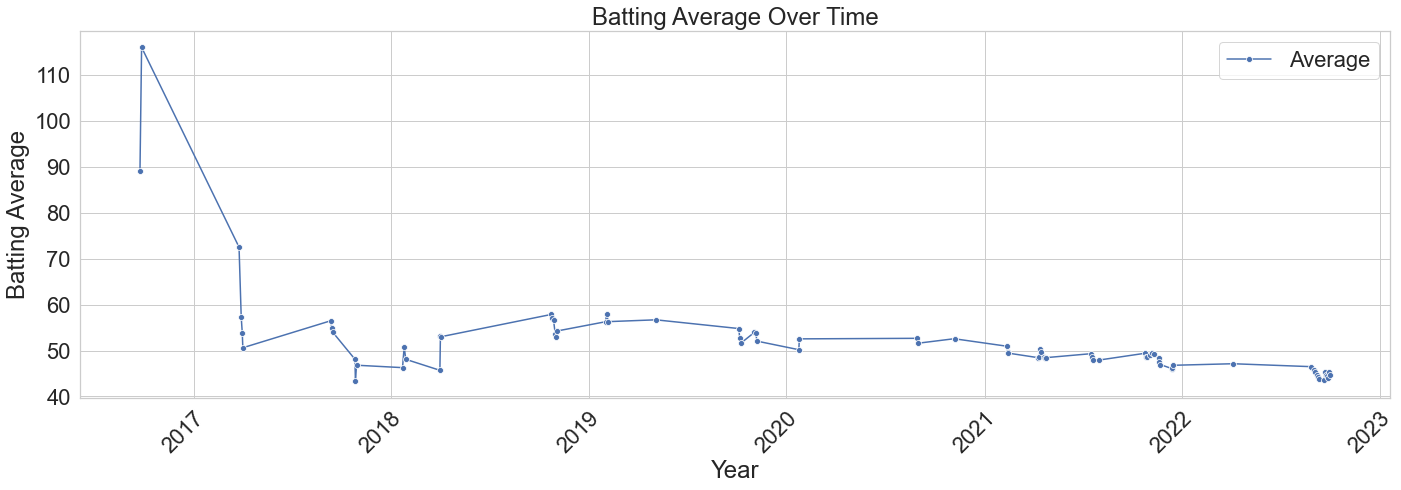

In [177]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.set(font="Verdana")
sns.set(font_scale = 2)

sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(20,7))

# p = sns.barplot(x="date", y="runs", data=merg_df)
# barplot(data=df, x="island", y="body_mass_g")
p = sns.lineplot(data=merg_df, x='dates',y='avg', label = 'Average', marker = 'o')

p.set_xlabel("Year")
p.set_ylabel("Batting Average")
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()

# axes.xaxis.set_major_locator(months)
# axes.xaxis.set_major_formatter(years_fmt)
# axes.xaxis.set_minor_locator(months)

p.set_title('Batting Average Over Time')



# plt.xticks(rotation = 'vertical')

# plt.draw()

plt.savefig('plots/batt_avg_time.png',dpi=300)
plt.show()

In [286]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(temp)

                                      runs  out
match_fname  against_team dates                
913663.json  England      2016-09-07    15    0
1050217.json West Indies  2016-09-23    55    0
1050219.json West Indies  2016-09-24    19    1
1050221.json West Indies  2016-09-27    27    0
1077947.json West Indies  2017-03-26    29    1
1077948.json West Indies  2017-03-30    27    1
1085495.json West Indies  2017-04-01    43    1
1085496.json West Indies  2017-04-02    38    1
1117821.json ICC World XI 2017-09-12    86    1
1117822.json ICC World XI 2017-09-13    45    1
1117824.json ICC World XI 2017-09-15    48    1
1120291.json Sri Lanka    2017-10-26     1    1
1120292.json Sri Lanka    2017-10-27     1    1
1120293.json Sri Lanka    2017-10-29    34    0
1115807.json New Zealand  2018-01-22    41    1
1115808.json New Zealand  2018-01-25    50    0
1115809.json New Zealand  2018-01-28    18    1
1140069.json West Indies  2018-04-01    17    1
1140070.json West Indies  2018-04-02    

In [149]:
merg_df['pak_toss_win']

,date,name,match_type,outcome,player_of_match,toss_winner,toss_decision,match_venue,against,result,pak_first_innings,runs,cumSum,dates,outs_cs,avg
match_filename,,,,,,,,,,,,,,,,
913663.json,2016-09-07,,T20,Pakistan,Wahab Riaz,England,bat,Old Trafford,England,Win,field,15.0,15.0,2016-09-07,0.0,inf
1050217.json,2016-09-23,Pakistan v West Indies T20I Series,T20,Pakistan,Imad Wasim,Pakistan,field,Dubai International Cricket Stadium,West Indies,Win,field,55.0,70.0,2016-09-23,0.0,inf
1050219.json,2016-09-24,Pakistan v West Indies T20I Series,T20,Pakistan,Sarfraz Ahmed,West Indies,field,Dubai International Cricket Stadium,West Indies,Win,bat,19.0,89.0,2016-09-24,1.0,89.000000
1050221.json,2016-09-27,Pakistan v West Indies T20I Series,T20,Pakistan,Imad Wasim,Pakistan,field,Sheikh Zayed Stadium,West Indies,Win,field,27.0,116.0,2016-09-27,1.0,116.000000
1077947.json,2017-03-26,Pakistan in West Indies T20I Series,T20,Pakistan,Shadab Khan,Pakistan,field,"Kensington Oval, Bridgetown",West Indies,Win,field,29.0,145.0,2017-03-26,2.0,72.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327230.json,2022-09-23,England tour of Pakistan,T20,England,HC Brook,Pakistan,field,"National Stadium, Karachi",England,Lose,field,8.0,2903.0,2022-09-23,65.0,44.661538
1327231.json,2022-09-25,England tour of Pakistan,T20,Pakistan,Haris Rauf,England,field,"National Stadium, Karachi",England,Win,bat,36.0,2939.0,2022-09-25,66.0,44.530303
1327232.json,2022-09-28,England tour of Pakistan,T20,Pakistan,Mohammad Rizwan,England,field,"Gaddafi Stadium, Lahore",England,Win,bat,9.0,2948.0,2022-09-28,67.0,44.000000


<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

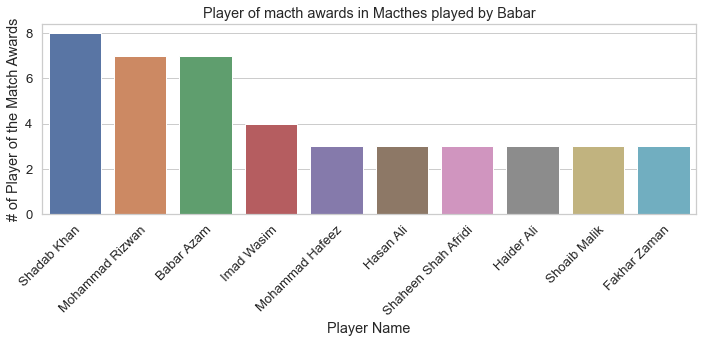

In [151]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='player_of_match', 
                  data=merg_df,
                 order = merg_df['player_of_match'].value_counts().iloc[:10].index)
p.set_xlabel("Player Name")
p.set_ylabel("# of Player of the Match Awards")
p.set_title('Player of macth awards in Macthes played by Babar')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


In [155]:
merg_df['Pak_toss_win'] = merg_df.apply(pak_toss_win,axis=1)


<module 'matplotlib.pyplot' from '/Users/asim/miniforge3/envs/mlp/lib/python3.8/site-packages/matplotlib/pyplot.py'>

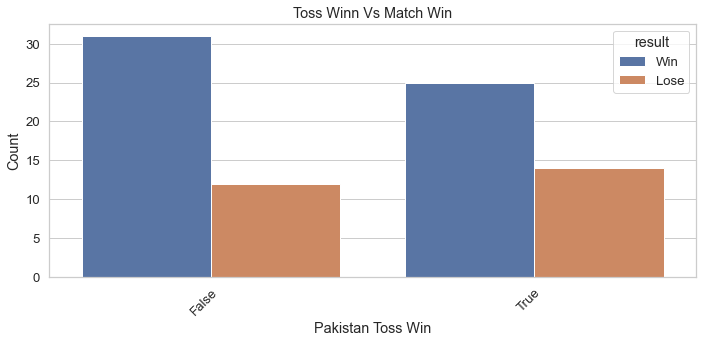

In [158]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

sns.set_style("whitegrid")
p = sns.countplot(x='Pak_toss_win', 
                  data=merg_df,
                 order = merg_df['Pak_toss_win'].value_counts().iloc[:10].index, hue='result')
p.set_xlabel("Pakistan Toss Win")
p.set_ylabel("Count")
p.set_title('Toss Winn Vs Match Win')
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.tight_layout()
plt


In [160]:
merg_df.groupby('pak_first_innings').sum()

,runs,cumSum,outs_cs,avg,Pak_toss_win
pak_first_innings,,,,,
Bat,805.0,22168.0,440.0,881.988451,17
bat,906.0,46292.0,975.0,1368.692192,0
field,1269.0,60940.0,1259.0,NaN,22


In [287]:
ba_df[ba_df['match_type'] == 'T20']['runs'].sum()

2754

In [ ]:
dates = answers.index 
sums = answers.values 

fig, ax = plt.subplots()

ax.plot(range(len(dates)), sums, 'ro-')
ax.set_xticks(range(0, len(dates), 3))       # need to adjust to ensure plot is readable
ax.set_xticklabels(dates[::3], rotation=90)
ax.set_xlabel("Dates")
ax.set_ylabel("Sums")
ax.set_title("Sum Over Dates")
plt.show();

In [215]:
ba_df.dtypes

match_fname      object
match_type       object
toss_winner      object
toss_decision    object
match_venue      object
against_team     object
outcome          object
batter           object
non_striker      object
runs              int64
bowler           object
out                bool
fielders         object
wicket_kind      object
dtype: object

In [208]:
ba_df['wicket_kind'].value_counts()

caught               106
bowled                28
lbw                   21
caught and bowled      5
stumped                4
run out                4
retired hurt           1
Name: wicket_kind, dtype: int64

In [209]:
ba_df['bowler'].value_counts()

JO Holder           251
K Rabada            189
PJ Cummins          183
AU Rashid           170
ST Gabriel          158
                   ... 
Fazalhaq Farooqi      1
N Pooran              1
MD Shanaka            1
AT Rayudu             1
AD Mathews            1
Name: bowler, Length: 261, dtype: int64

In [218]:
ba_df[ba_df['out'] == True]['bowler'].value_counts()

JR Hazlewood    6
N Pradeep       5
AU Rashid       5
TG Southee      4
MA Starc        4
               ..
Imran Tahir     1
RR Hendricks    1
Ravi Bishnoi    1
JM Anderson     1
SS Pathirana    1
Name: bowler, Length: 107, dtype: int64

In [220]:
ba_df[ba_df['runs'] == 6]['bowler'].value_counts()

AU Rashid          7
MW Parkinson       4
PWH de Silva       3
SP Narine          3
BE Hendricks       3
                  ..
TS Chisoro         1
W Madhevere        1
M Theekshana       1
NGRP Jayasuriya    1
L Embuldeniya      1
Name: bowler, Length: 61, dtype: int64

In [221]:
ba_df[ba_df['runs'] == 4]['bowler'].value_counts()

K Rabada        19
DW Steyn        18
AS Joseph       16
TA Boult        16
JO Holder       16
                ..
A Phillip        1
R Powell         1
TLW Cooper       1
CN Greaves       1
Taskin Ahmed     1
Name: bowler, Length: 215, dtype: int64

In [222]:
ba_df[ba_df['runs'] == 0]['bowler'].value_counts()

JO Holder          163
K Rabada           130
PJ Cummins         118
ST Gabriel         115
TA Boult           106
                  ... 
JE Taylor            1
Afif Hossain         1
Al-Amin Hossain      1
BJ McCarthy          1
AR McBrine           1
Name: bowler, Length: 248, dtype: int64

In [223]:
ba_df[ba_df['runs'] == 1]['bowler'].value_counts()

A Zampa            86
AU Rashid          71
SP Narine          67
Imran Tahir        56
JO Holder          54
                   ..
MD Shanaka          1
D Wiese             1
FDM Karunaratne     1
JM Bird             1
SS Cottrell         1
Name: bowler, Length: 252, dtype: int64

In [224]:
ba_df[ba_df['runs'] == 2]['bowler'].value_counts()

PJ Cummins        18
JO Holder         15
AU Rashid         12
SP Narine         10
TA Boult          10
                  ..
DJ Bravo           1
Mohammed Shami     1
SHA Rance          1
VJ Kingma          1
MP Stoinis         1
Name: bowler, Length: 184, dtype: int64

In [225]:
ba_df[ba_df['runs'] == 3]['bowler'].value_counts()

PJ Cummins         5
NM Lyon            4
MA Starc           3
RL Chase           3
AS Joseph          3
TG Southee         3
AY Patel           2
LN Roche           2
AU Rashid          2
TL Chatara         2
JO Holder          2
D Bishoo           2
JR Hazlewood       2
Taijul Islam       2
MA Wood            2
ST Gabriel         2
Ebadat Hossain     2
DM Bess            2
L Gregory          2
IS Sodhi           2
TA Boult           2
PLS Gamage         2
NLTC Perera        1
MJ Henry           1
NM Coulter-Nile    1
AK Markram         1
K Rabada           1
JJ Bumrah          1
MR Marsh           1
CBRLS Kumara       1
TK Curran          1
D Paterson         1
LV van Beek        1
NGRP Jayasuriya    1
C de Grandhomme    1
D Wiese            1
JN Frylinck        1
JE Root            1
KR Mayers          1
RAS Lakmal         1
KS Williamson      1
B Muzarabani       1
KA Maharaj         1
PWA Mulder         1
CAK Rajitha        1
JP Faulkner        1
BFW de Leede       1
SC Williams  

In [226]:
ba_df[ba_df['runs'] == 5]['bowler'].value_counts()

MJ Santner        1
PADLR Sandakan    1
Name: bowler, dtype: int64

In [206]:
from pandas_profiling import ProfileReport

In [207]:
#EDA using pandas-profiling
profile = ProfileReport(ba_df, explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [232]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(ba_df[ba_df['match_type'] == 'T20'])

#Saving results to HTML file
sweet_report.show_html('sweet_report_t20.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sweet_report_t20.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [330]:
data = ''
with open('pakistan_male_json/' + '1077953.json', 'r') as f:
  data = json.load(f)
    
data

{'meta': {'data_version': '1.0.0', 'created': '2017-04-27', 'revision': 1},
 'info': {'balls_per_over': 6,
  'city': 'Jamaica',
  'dates': ['2017-04-21',
   '2017-04-22',
   '2017-04-23',
   '2017-04-24',
   '2017-04-25'],
  'event': {'match_number': 1, 'name': 'Pakistan in West Indies Test Series'},
  'gender': 'male',
  'match_type': 'Test',
  'match_type_number': 2259,
  'officials': {'match_referees': ['BC Broad'],
   'reserve_umpires': ['GO Brathwaite'],
   'tv_umpires': ['BNJ Oxenford'],
   'umpires': ['RK Illingworth', 'RA Kettleborough']},
  'outcome': {'by': {'wickets': 7}, 'winner': 'Pakistan'},
  'player_of_match': ['Yasir Shah'],
  'players': {'Pakistan': ['Azhar Ali',
    'Ahmed Shehzad',
    'Babar Azam',
    'Younis Khan',
    'Misbah-ul-Haq',
    'Asad Shafiq',
    'Sarfraz Ahmed',
    'Mohammad Amir',
    'Wahab Riaz',
    'Yasir Shah',
    'Mohammad Abbas'],
   'West Indies': ['KC Brathwaite',
    'KOA Powell',
    'SO Hetmyer',
    'SD Hope',
    'VA Singh',
    'RL 